**UPDATE (March 2018):** For a more modern solution that uses an interactive JavaScript widget, please go to my new post: [Embedding Matplotlib Animations in Jupyter as Interactive JavaScript Widgets](../embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets).

-----

In his blog post [Embedding Matplotlib Animations in IPython Notebooks](http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/), Jake VanderPlas presents a slick hack for embedding Matplotlib Animations in IPython Notebooks, which involves writing it as a video to a [tempfile](https://docs.python.org/2/library/tempfile.html), and then re-encoding it in Base64 as a HTML5 Video.

Unfortunately (or rather fortunately), this hack has been largely rendered obsolete by the heavy development efforts dedicated to both Matplotlib and IPython Notebook ([since renamed to Jupyter Notebook](https://blog.jupyter.org/2015/08/12/first-release-of-jupyter/)) in recent years. In particular, [Matplotlib 1.5.1](http://matplotlib.org/users/whats_new.html#new-in-matplotlib-1-5) now [supports inline display of animations in the notebook](http://matplotlib.org/users/whats_new.html#display-hook-for-animations-in-the-ipython-notebook) with the `to_html5_video` method, which converts the animation to an h264 encoded video and embeddeds it directly in the notebook.

In this notebook, we reproduce Jake VanderPlas' blog post with this new feature.

<!-- TEASER_END -->

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

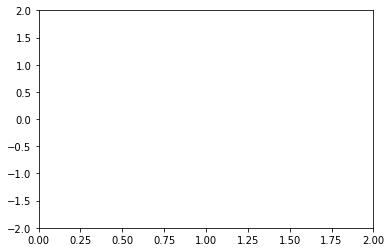

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [4]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [5]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [8]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [9]:
HTML(anim.to_html5_video())

Note that [Animation](http://matplotlib.org/api/animation_api.html#matplotlib.animation.Animation) instances now have a `_repr_html_` method. However, it returns `None` by default.

In [10]:
anim._repr_html_() is None

True

This means we won't get any sort of animation from the inline display.

In [11]:
anim

The method used to display is controlled by the `animation.html` rc parameter, which currently supports values of `none` and `html5`. `none` is the default, performing no display. We simply need to set it to `html5`:

In [12]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [11]:
anim

And that's all there is to it!